# Air Quality Index (AQI) Prediction

### Aim: To predict the AQI based on the historical data of Oklahoma City (USA), using Machine Learning algorithm

### Dataset: Dataset has been created by scraping two websites
    - https://en.tutiempo.net/ : To get the climate data
    - https://www.deq.ok.gov/air-quality-division/ambient-monitoring/past-air-data/ : To get air data

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
climate_data = pd.read_csv("AQIdata.csv")

In [3]:
climate_data.head()

,Date,T,TM,Tm,SLP,H,PP,VV,V,VM,Ozone conc,PM-2.5 conc,NO2 conc,SO2 conc,CO conc,PM-10 conc,AQI
0,2017/Jan/01,6.9,15.6,0.0,1011.4,57,0.00,16.1,13.3,20.6,0.034,11.2,0.034,0.0,0.4,16.0,47.0
1,2017/Jan/02,13.4,20.0,1.7,1007.5,77,0.51,10.9,20.4,29.4,0.037,6.4,0.027,0.0,0.5,9.0,34.0
2,2017/Jan/03,4.8,20.0,-1.1,1015.5,70,0.00,14.0,29.1,50.0,0.026,9.6,0.009,0.0,0.5,12.0,40.0
3,2017/Jan/04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031,5.6,0.028,0.0,0.4,10.0,29.0
4,2017/Jan/05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035,6.3,0.012,0.0,0.3,13.0,32.0


In [4]:
data_descr = pd.read_csv("AQIdata_description.csv", sep='\t')
data_descr

,Fields,Description
0,Date,Date
1,T,Average Temperature (°C)
2,TM,Maximum temperature (°C)
3,Tm,Minimum temperature (°C)
4,SLP,Atmospheric pressure at sea level (hPa)
5,H,Average relative humidity (%)
6,PP,Total rainfall and / or snowmelt (mm)
7,VV,Average visibility (Km)
8,V,Average wind speed (Km/h)
9,VM,Maximum sustained wind speed (Km/h)


### Data Analysis

In [5]:
null_count = climate_data.isnull().sum() 
null_count

Date             0
T              534
TM             534
Tm             534
SLP            534
H              534
PP             534
VV             534
V              534
VM             534
Ozone conc       1
PM-2.5 conc      4
NO2 conc         4
SO2 conc        10
CO conc          1
PM-10 conc      21
AQI              1
dtype: int64

In [6]:
null_values = { 'NaN count':null_count, 'NaN percent': null_count * 100 / climate_data.shape[0] }
pd.DataFrame (null_values, columns = ['NaN count','NaN percent'])

,NaN count,NaN percent
Date,0,0.000000
T,534,48.767123
TM,534,48.767123
Tm,534,48.767123
SLP,534,48.767123
H,534,48.767123
PP,534,48.767123
VV,534,48.767123
V,534,48.767123
VM,534,48.767123


In [7]:
climate_data.dtypes

Date            object
T              float64
TM             float64
Tm             float64
SLP            float64
H               object
PP             float64
VV             float64
V              float64
VM             float64
Ozone conc     float64
PM-2.5 conc    float64
NO2 conc       float64
SO2 conc       float64
CO conc        float64
PM-10 conc     float64
AQI            float64
dtype: object

In [8]:
# Drop the columns with high NaN values
climate_data.drop(['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM'], inplace=True, axis=1)

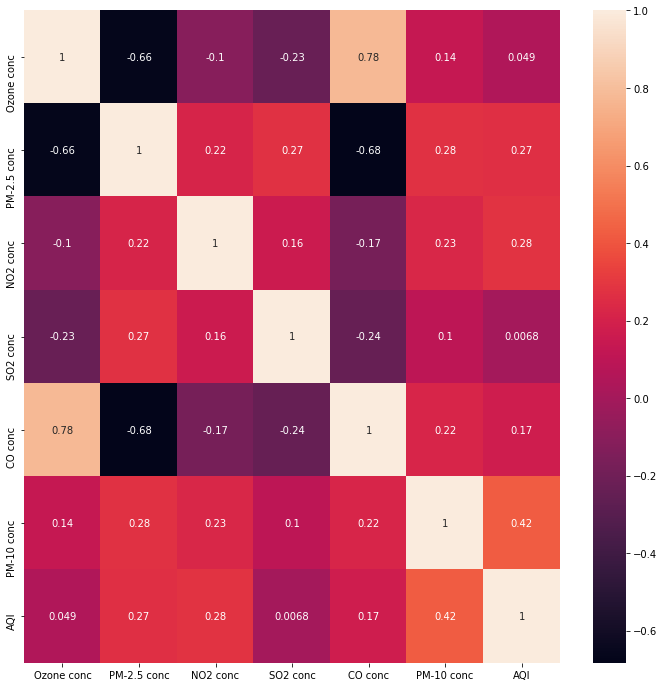

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(climate_data.corr(), annot=True)

In [10]:
climate_data.corr()['AQI'].sort_values(ascending=False)

AQI            1.000000
PM-10 conc     0.424785
NO2 conc       0.278362
PM-2.5 conc    0.267038
CO conc        0.171870
Ozone conc     0.048760
SO2 conc       0.006827
Name: AQI, dtype: float64

In [11]:
climate_data = climate_data.dropna()

In [12]:
climate_data.head()

,Date,Ozone conc,PM-2.5 conc,NO2 conc,SO2 conc,CO conc,PM-10 conc,AQI
0,2017/Jan/01,0.034,11.2,0.034,0.0,0.4,16.0,47.0
1,2017/Jan/02,0.037,6.4,0.027,0.0,0.5,9.0,34.0
2,2017/Jan/03,0.026,9.6,0.009,0.0,0.5,12.0,40.0
3,2017/Jan/04,0.031,5.6,0.028,0.0,0.4,10.0,29.0
4,2017/Jan/05,0.035,6.3,0.012,0.0,0.3,13.0,32.0


In [13]:
climate_data.corr()['AQI'].sort_values(ascending=False)

AQI            1.000000
PM-10 conc     0.421284
NO2 conc       0.283446
PM-2.5 conc    0.257516
CO conc        0.173430
Ozone conc     0.050039
SO2 conc       0.005791
Name: AQI, dtype: float64

In [14]:
climate_data['SO2 conc'].value_counts()

0.0000    860
0.0010    164
0.0020     25
0.0030      8
0.0011      1
0.0008      1
Name: SO2 conc, dtype: int64

In [15]:
# Dropping 'SO2 conc' column, since most of the values are zero
climate_data = climate_data.drop(['SO2 conc'], axis=1)

### ML Model

In [16]:
X = climate_data.drop(['Date','AQI'],axis=1)

In [17]:
y = climate_data['AQI']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

#### (a) XG Boost Regressor

In [19]:
import xgboost as xgb

In [20]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

[22:19:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [21]:
xgb_pred = np.round(xgb_reg.predict(X_test))

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
print(f'MAE:{mean_absolute_error(y_test, xgb_pred)}\n MSE:{mean_squared_error(y_test, xgb_pred)}')

MAE:1.7893081761006289
 MSE:8.29245283018868


In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
#Randomized Search CV

# Number of estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [26]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

In [27]:
xg_random = RandomizedSearchCV(estimator = xgb_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 100, cv = 5, verbose=2, random_state=4, n_jobs = 1)

In [28]:
xg_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.6, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.5 
[22:20:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.5 
[22:20:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.5 
[22:20:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.6s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.5 
[22:20:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.5 
[22:20:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=6, m

[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=5, learning_rate=0.05 
[22:20:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=5, learning_rate=0.2 
[22:20:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=5, learning_rate=0.2, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=5, learning_rate=0.2 
[22:20:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_d

[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   1.1s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.6 
[22:20:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.6 
[22:20:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   1.3s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=25, learning_rate=0.6 
[22:20:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1000, min_child_weigh

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   2.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=25, learning_rate=0.05 
[22:21:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   3.5s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=25, learning_rate=0.05 
[22:21:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   2.6s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.05 
[22:21:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=200, min_child_we

[CV]  subsample=0.8, n_estimators=900, min_child_weight=6, max_depth=20, learning_rate=0.05, total=   1.5s
[CV] subsample=0.8, n_estimators=900, min_child_weight=6, max_depth=20, learning_rate=0.05 
[22:21:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=900, min_child_weight=6, max_depth=20, learning_rate=0.05, total=   1.5s
[CV] subsample=0.8, n_estimators=900, min_child_weight=6, max_depth=20, learning_rate=0.05 
[22:21:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=900, min_child_weight=6, max_depth=20, learning_rate=0.05, total=   1.5s
[CV] subsample=0.8, n_estimators=900, min_child_weight=6, max_depth=20, learning_rate=0.05 
[22:21:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=900, min_child_weight

[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=20, learning_rate=0.6 
[22:22:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=20, learning_rate=0.6 
[22:22:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=25, learning_rate=0.05 
[22:22:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weig

[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1 
[22:22:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.1, total=   0.6s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=4, max_depth=15, learning_rate=0.5 
[22:22:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=4, max_depth=15, learning_rate=0.5, total=   0.9s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=4, max_depth=15, learning_rate=0.5 
[22:22:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=4

[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.2, total=   0.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.2 
[22:23:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.2, total=   0.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.2 
[22:23:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.2, total=   0.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.2 
[22:23:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, ma

[CV]  subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, total=   0.8s
[CV] subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2 
[22:23:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, total=   0.8s
[CV] subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2 
[22:23:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.2, total=   1.1s
[CV] subsample=0.6, n_estimators=700, min_child_weight=4, max_depth=25, learning_rate=0.2 
[22:23:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=700, min_child_weight=4, ma

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.7s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.2 
[22:24:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.2, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.2 
[22:24:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.2, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.2 
[22:24:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_dep

[CV]  subsample=0.6, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.6 
[22:24:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.6, total=   1.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.6 
[22:24:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.6, total=   1.1s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.6 
[22:24:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weigh

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   1.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[22:25:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   2.1s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.05 
[22:25:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=3, max_depth=15, learning_rate=0.05 
[22:25:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1000, min_child

[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.6s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.3 
[22:25:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.5s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.3 
[22:25:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=6, max_depth=10, learning_rate=0.3 
[22:25:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1000, min_child_weigh

[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.05, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.05 
[22:26:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.05, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.05 
[22:26:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=25, learning_rate=0.05, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=25, learning_rate=0.5 
[22:26:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=900, min_child_weight=

[CV]  subsample=0.8, n_estimators=700, min_child_weight=4, max_depth=10, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=600, min_child_weight=4, max_depth=20, learning_rate=0.2 
[22:26:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=600, min_child_weight=4, max_depth=20, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=600, min_child_weight=4, max_depth=20, learning_rate=0.2 
[22:26:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=600, min_child_weight=4, max_depth=20, learning_rate=0.2, total=   1.6s
[CV] subsample=0.8, n_estimators=600, min_child_weight=4, max_depth=20, learning_rate=0.2 
[22:26:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=600, min_child_weight=4, ma

[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.05 
[22:26:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.05 
[22:26:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   1.1s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.05 
[22:26:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight

[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.1, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.1 
[22:27:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.1, total=   1.3s
[CV] subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.2 
[22:27:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   1.0s
[CV] subsample=0.6, n_estimators=900, min_child_weight=7, max_depth=5, learning_rate=0.2 
[22:27:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=7, max_d

[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   0.5s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.1 
[22:27:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   0.7s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.1 
[22:27:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   0.7s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.1 
[22:27:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_dept

[CV]  subsample=0.8, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2 
[22:27:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2 
[22:27:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=300, min_child_weight=5, max_depth=25, learning_rate=0.2, total=   0.8s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[22:28:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, ma

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.7min finished


[22:28:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                            

In [29]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 700,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': '0.05'}

In [30]:
xg_random.best_score_

-10.705658658348348

In [31]:
#XG Boost prediction using best parameters
xgb_pred = np.round(xg_random.predict(X_test))

In [32]:
#XG Boost performance
print(f'MAE:{mean_absolute_error(y_test, xgb_pred)}\n MSE:{mean_squared_error(y_test, xgb_pred)}')

MAE:1.0220125786163523
 MSE:4.90251572327044


In [33]:
results_comp = {'true_values': y_test, 'predictions':xgb_pred}
pd.DataFrame(results_comp)

,true_values,predictions
180,58.0,56.0
65,55.0,61.0
759,35.0,36.0
991,38.0,38.0
428,44.0,43.0
...,...,...
1058,54.0,53.0
855,58.0,57.0
360,28.0,29.0
1080,53.0,52.0


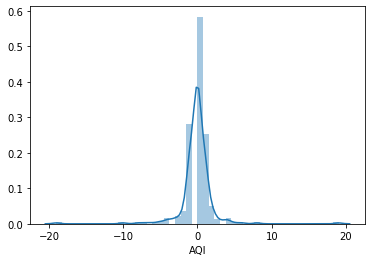

In [34]:
sns.distplot(y_test-xgb_pred)

#### (b) Linear Regression model

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_pred = np.round(lin_reg.predict(X_test))

In [36]:
print(f'MAE:{mean_absolute_error(y_test, lin_pred)}\n MSE:{mean_squared_error(y_test, lin_pred)}')

MAE:8.776729559748428
 MSE:153.14779874213838


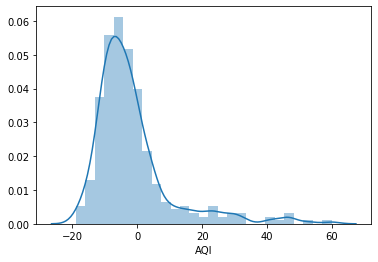

In [37]:
sns.distplot(y_test-lin_pred)

#### (c) Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
rf_pred = np.round(rf_reg.predict(X_test))

In [39]:
print(f'MAE:{mean_absolute_error(y_test, rf_pred)}\n MSE:{mean_squared_error(y_test, rf_pred)}')

MAE:0.6069182389937107
 MSE:2.380503144654088


In [40]:
# Model tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [41]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [42]:
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 100, cv = 5, verbose=2, random_state=4, n_jobs = 1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.5s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.9s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.4s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   1.0s
[CV] n_estimators=600, min_samples_split=2, min_samp

[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   2.8s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   3.1s
[CV] n_estimators=200, min_samples

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15, total=   2.7s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   1.4s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   2.8s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=900, min_samples_split=2, min_sa

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.4s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1100, min_samples_spli

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.1s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.9s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=600, min_samples_split=15

[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=1100, min_sa

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=15

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.0s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.2s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf

[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=700, min_samples_split=1

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   2.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   3.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   2.6s
[CV] n_estimators=1000, min_s

[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=700, min_samples_sp

[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.9s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.9s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.9s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   1.7s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   2.9s
[CV] n_estimators=900, min_samples_split=2, min_samples_l

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=400, min_samples_split=2, mi

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [44]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [45]:
rf_random.best_score_

-10.95441744788328

In [46]:
#RF prediction with best parameters
rf_pred=np.round(rf_random.predict(X_test))

In [47]:
print(f'MAE:{mean_absolute_error(y_test, rf_pred)}\n MSE:{mean_squared_error(y_test, rf_pred)}')

MAE:0.6132075471698113
 MSE:2.4245283018867925


In [48]:
results_comp = {'true_values': y_test, 'predictions':rf_pred}
pd.DataFrame(results_comp)

,true_values,predictions
180,58.0,57.0
65,55.0,57.0
759,35.0,35.0
991,38.0,38.0
428,44.0,44.0
...,...,...
1058,54.0,54.0
855,58.0,57.0
360,28.0,29.0
1080,53.0,53.0


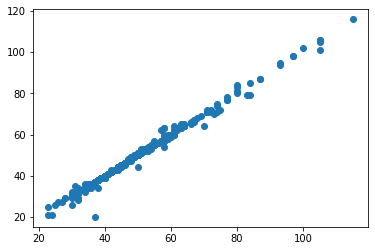

In [49]:
plt.scatter(y_test,rf_pred)

#### Random Forest Regressor has the best performance

In [50]:
# Save the RF regressor model 
import pickle
# open a file, to store the data
file = open('aqi_rf_reg_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [61]:
tt = [[0.067, 7.8, 0.028, 0.4, 27]]
np.round(rf_random.predict(tt))

array([90.])

In [60]:
max(y)

150.0